## Import libraries to help me

In [441]:
!pip install category_encoders

In [442]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer , KNNImputer
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder ,StandardScaler  , MinMaxScaler
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier ,plot_tree
from sklearn.ensemble import   RandomForestClassifier  , GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

## Load the dataset

In [444]:
df = pd.read_csv('credit score data.csv')

In [445]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,"1,824.84",3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.00,_,809.98,26.82,22 Years and 1 Months,No,49.57,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.00,Good,809.98,31.94,NaN,No,49.57,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.00,Good,809.98,28.61,22 Years and 3 Months,No,49.57,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.00,Good,809.98,31.38,22 Years and 4 Months,No,49.57,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,"1,824.84",3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.00,Good,809.98,24.80,22 Years and 5 Months,No,49.57,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [446]:
df.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,"3,359.42",4,6,7,2,"Auto Loan, and Student Loan",23,7,11.5,3.00,_,502.38,34.66,31 Years and 6 Months,No,35.10,60.97133255718485,High_spent_Large_value_payments,479.87,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,"3,359.42",4,6,7,2,"Auto Loan, and Student Loan",18,7,11.5,3.00,_,502.38,40.57,31 Years and 7 Months,No,35.10,54.18595028760385,High_spent_Medium_value_payments,496.65,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,"3,359.42",4,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,3.00,Good,502.38,41.26,31 Years and 8 Months,No,35.10,24.02847744864441,High_spent_Large_value_payments,516.81,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,"3,359.42",4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,3.00,Good,502.38,33.64,31 Years and 9 Months,No,35.10,251.67258219721603,Low_spent_Large_value_payments,319.16,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,"3,359.42",4,6,7,2,"Auto Loan, and Student Loan",18,6,11.5,3.00,Good,502.38,34.19,31 Years and 10 Months,No,35.10,167.1638651610451,!@9#%8,393.67,Poor


In [447]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

### Check the percentage of the missing values in all columns in dataset

In [449]:
df.isnull().mean()*100

ID                          0.00
Customer_ID                 0.00
Month                       0.00
Name                        9.98
Age                         0.00
SSN                         0.00
Occupation                  0.00
Annual_Income               0.00
Monthly_Inhand_Salary      15.00
Num_Bank_Accounts           0.00
Num_Credit_Card             0.00
Interest_Rate               0.00
Num_of_Loan                 0.00
Type_of_Loan               11.41
Delay_from_due_date         0.00
Num_of_Delayed_Payment      7.00
Changed_Credit_Limit        0.00
Num_Credit_Inquiries        1.97
Credit_Mix                  0.00
Outstanding_Debt            0.00
Credit_Utilization_Ratio    0.00
Credit_History_Age          9.03
Payment_of_Min_Amount       0.00
Total_EMI_per_month         0.00
Amount_invested_monthly     4.48
Payment_Behaviour           0.00
Monthly_Balance             1.20
Credit_Score                0.00
dtype: float64

### check the duplicated is there

In [451]:
df.duplicated().sum()

0

### Drop unnecessary columns in the dataset

In [453]:
drop_columns = ['ID', 'Customer_ID','Name', 'SSN', 'Month','Type_of_Loan']
df.drop(drop_columns , axis=1 , inplace=True)

In [454]:
df.shape

(100000, 22)

In [455]:
df.select_dtypes('O').columns

Index(['Age', 'Occupation', 'Annual_Income', 'Num_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [456]:
numeric_columns = ["Age", "Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts", "Num_Credit_Card","Interest_Rate","Num_of_Loan",
                   "Delay_from_due_date","Num_of_Delayed_Payment","Changed_Credit_Limit", "Num_Credit_Inquiries","Outstanding_Debt",
                   "Credit_Utilization_Ratio","Total_EMI_per_month","Amount_invested_monthly",	"Monthly_Balance","Credit_History_Age"]

categorical_columns = ["Occupation","Credit_Mix", "Spending_Level","Payment_Value","Payment_of_Min_Amount"]

target_column = ["Credit_Score"]

### check the data type of the numeric columns and repair it and extract number

In [458]:
for col in numeric_columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.extract(r'(\d+)')
        df[col] = pd.to_numeric(df[col] , errors='coerce')

In [459]:
df.loc[df['Age']>85,'Age'].value_counts()

Age
500     886
6799      4
5579      3
3920      3
1695      3
       ... 
5621      1
1908      1
4583      1
7549      1
1342      1
Name: count, Length: 1685, dtype: int64

In [460]:
df.drop(df[df['Age']>85].index , axis=0 , inplace=True)

<Axes: xlabel='Age', ylabel='Density'>

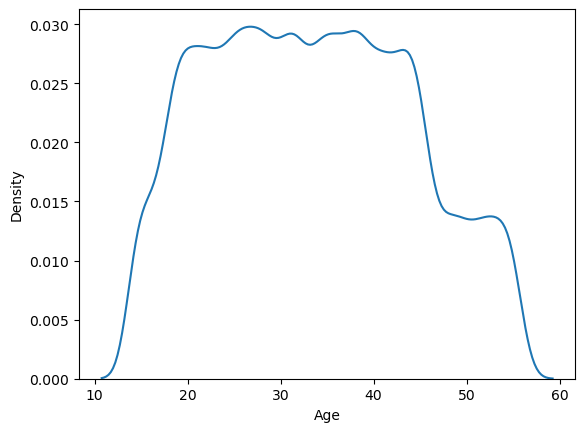

In [461]:
sns.kdeplot(df['Age'])

### Showing the distribution by histogram and kdplot for numierc columns

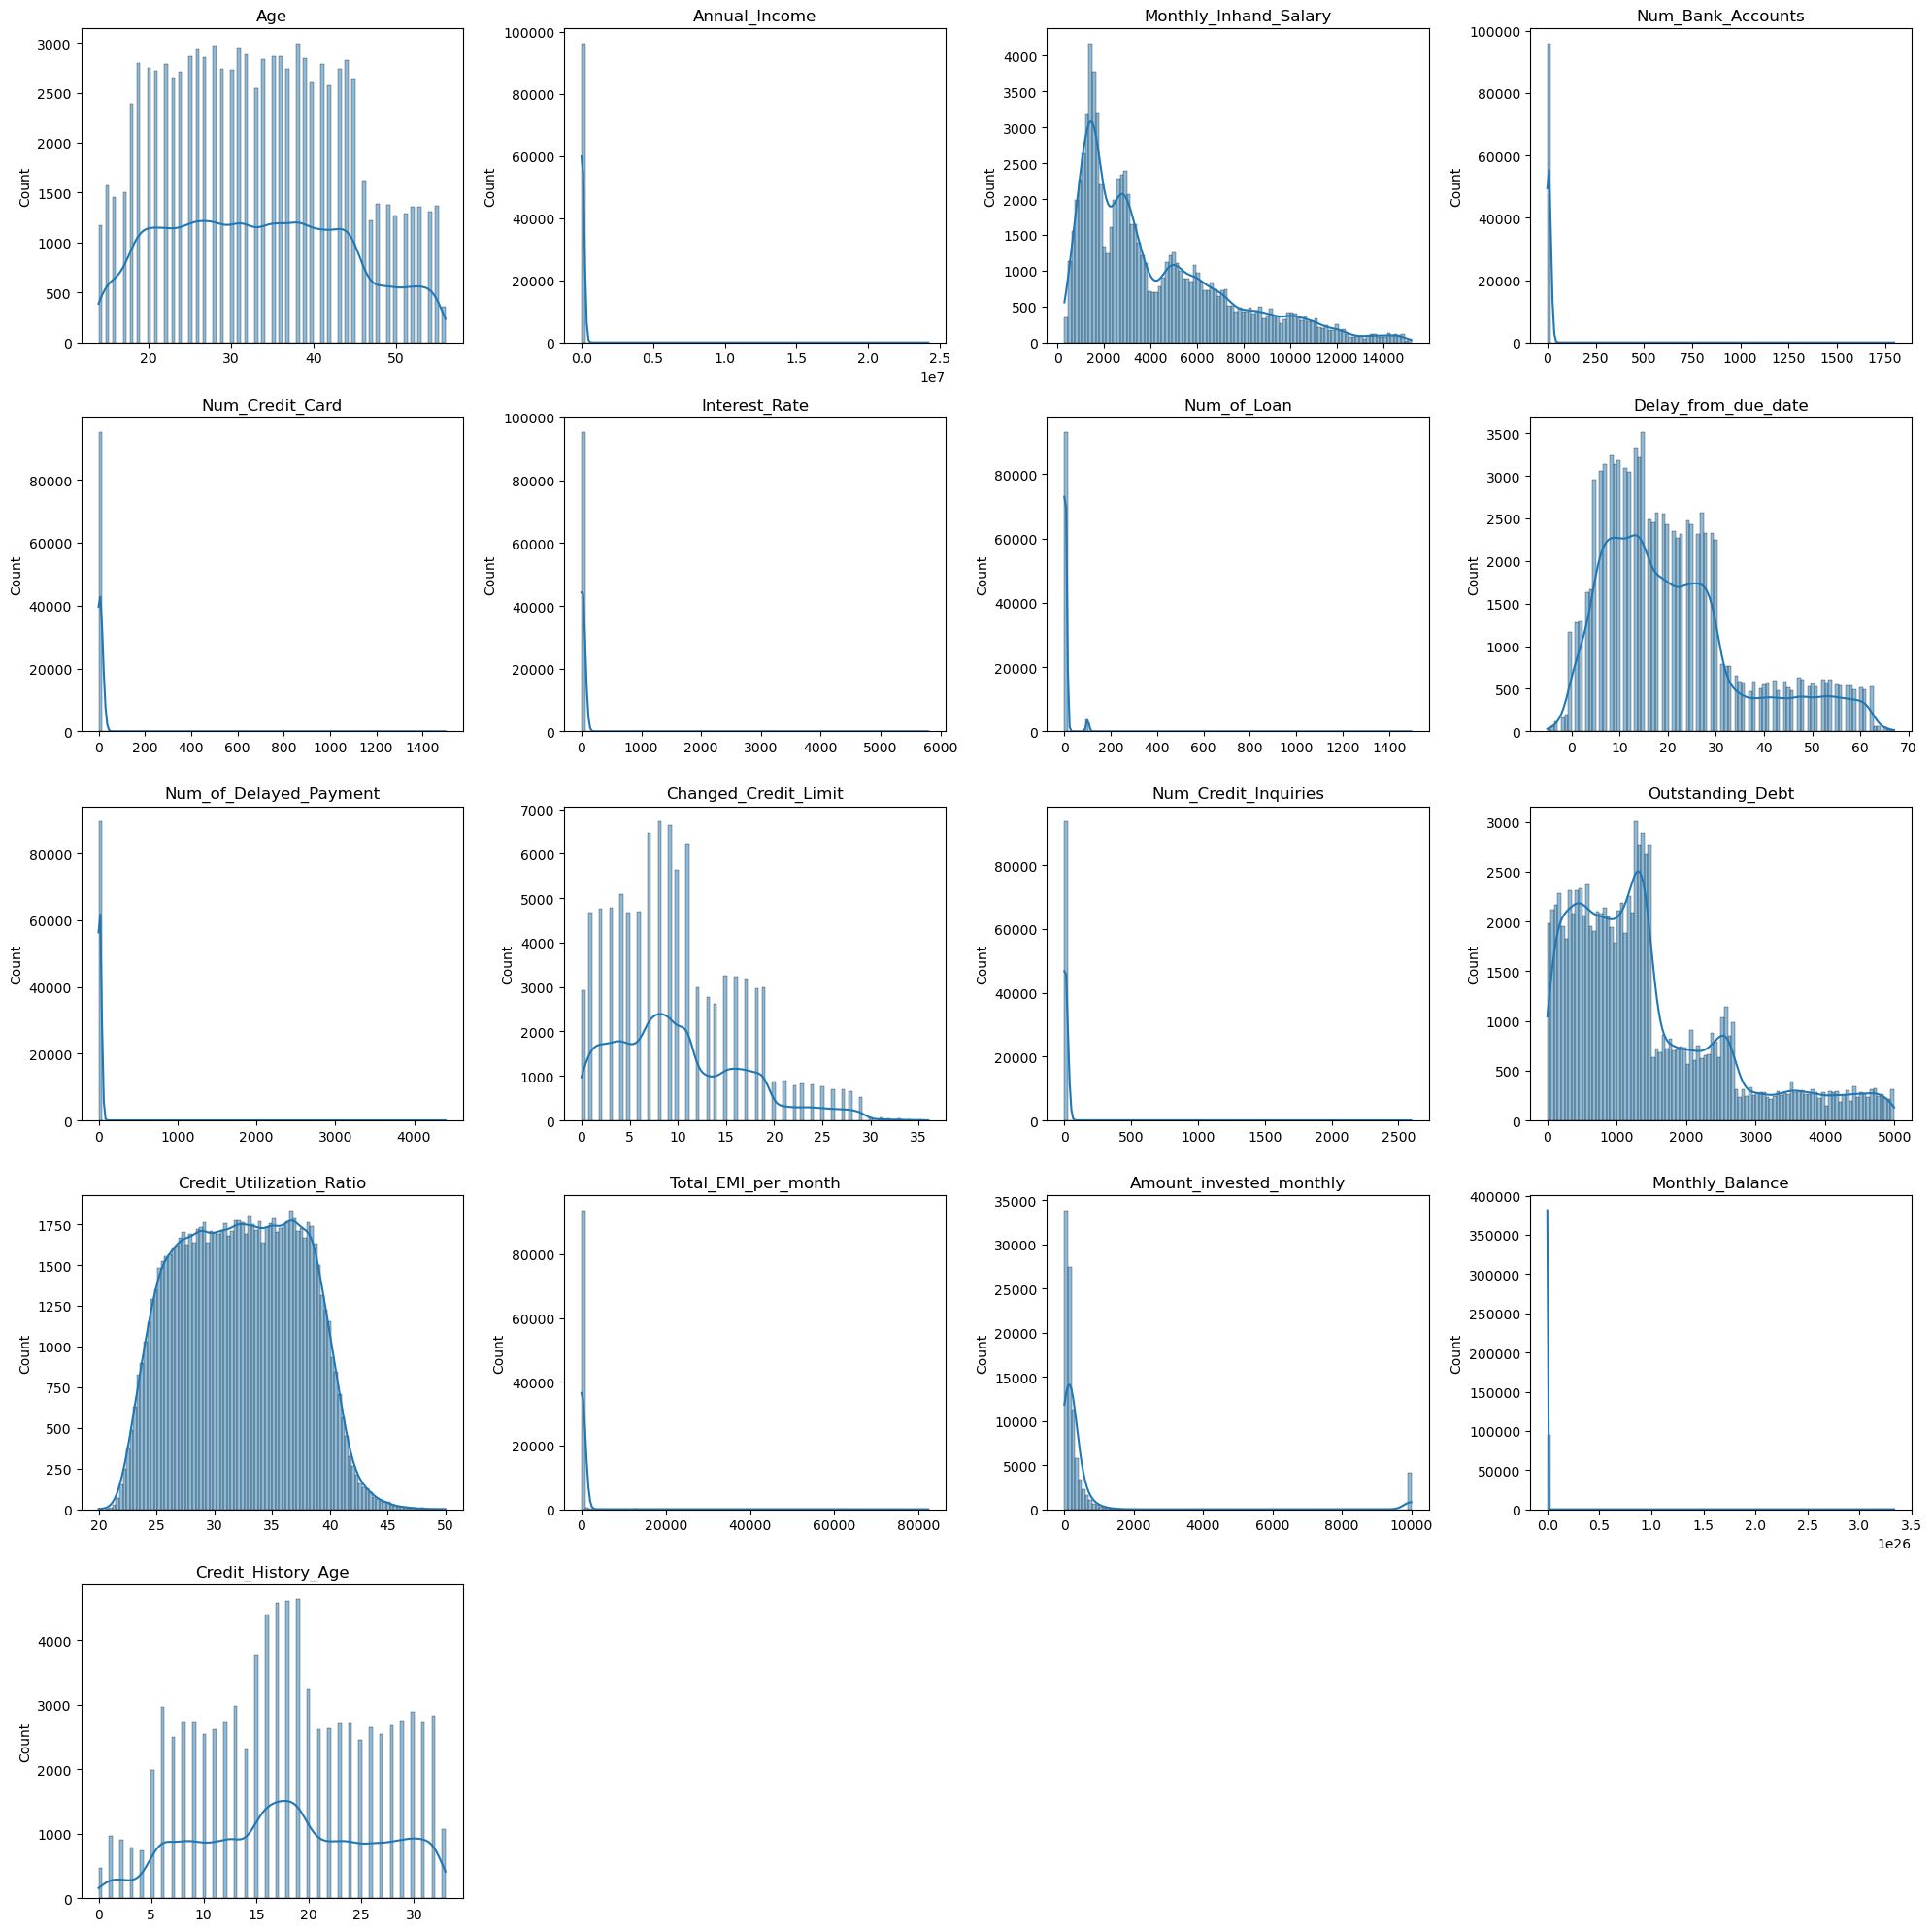

In [463]:
def plot_histograms(df, columns, rows=2, cols=3):

    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        if i < len(axes):
            sns.histplot(df[col], kde=True, ax=axes[i], bins=100)
            axes[i].set_title(col)
            axes[i].set_xlabel('')

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_histograms(df, numeric_columns, rows=5, cols=4)

### Make a function to remove the Outliers and function to get it

#### This function to get data without Outliers

In [466]:
def Check_Outliers(data , column):

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return outliers

#### This function to get Outliers

In [468]:
def Check_Outliers1(data , column):

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [469]:
Check_Outliers(df , 'Annual_Income')['Annual_Income']

0        19114
1        19114
3        19114
4        19114
5        19114
         ...  
99995    39628
99996    39628
99997    39628
99998    39628
99999    39628
Name: Annual_Income, Length: 94520, dtype: int64

In [470]:
df = Check_Outliers(df , 'Annual_Income')

<Axes: xlabel='Annual_Income', ylabel='Count'>

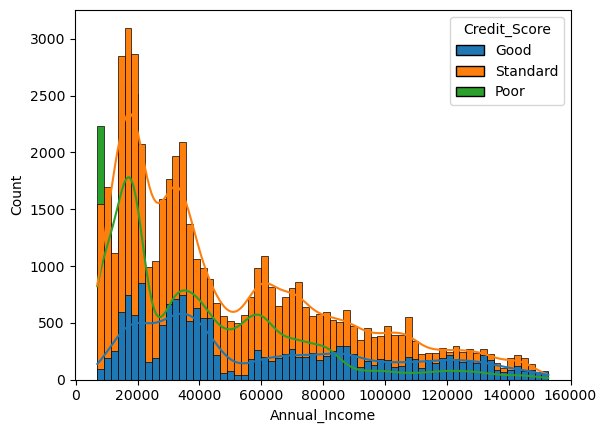

In [471]:
sns.histplot(data=df , x = df['Annual_Income'] , hue='Credit_Score' , kde=True, multiple = 'layer',alpha = 1)

### Repair the columns of Num_Bank_Accounts and Num_Credit_Card

In [473]:
df.drop(df[(df['Num_Bank_Accounts']>10) | (df['Num_Bank_Accounts']==0)].index , axis=0 , inplace=True)
df.drop(df[(df['Num_Credit_Card']>10) | (df['Num_Credit_Card']==0)].index , axis=0 , inplace=True)

In [474]:
df['Num_Bank_Accounts'] = np.abs(df['Num_Bank_Accounts'])

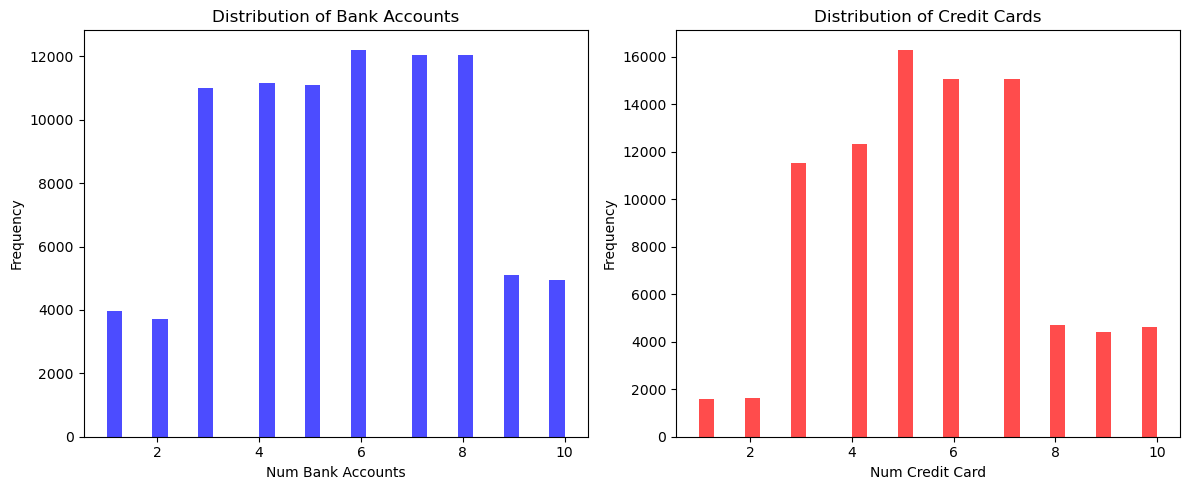

In [475]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].hist(df['Num_Bank_Accounts'], bins=30, alpha=0.7, color='blue')
axes[0].set_xlabel('Num Bank Accounts')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Bank Accounts')


axes[1].hist(df['Num_Credit_Card'], bins=30, alpha=0.7, color='red')
axes[1].set_xlabel('Num Credit Card')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Credit Cards')


plt.tight_layout()
plt.show()


In [476]:
df['Interest_Rate'].value_counts()

Interest_Rate
8       4124
5       4119
6       3910
18      3825
9       3823
        ... 
3446       1
3597       1
967        1
3790       1
5729       1
Name: count, Length: 1557, dtype: int64

In [477]:
df.loc[df['Interest_Rate'] > 34 , 'Interest_Rate' ] = np.nan

<Axes: xlabel='Interest_Rate', ylabel='Count'>

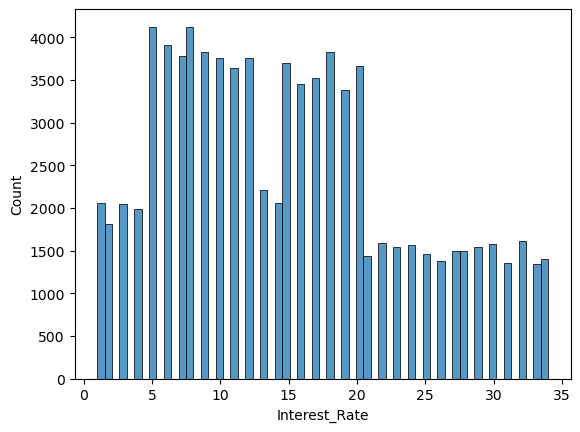

In [478]:
sns.histplot(df['Interest_Rate'])

In [479]:
df['Num_of_Loan'].value_counts()

Num_of_Loan
3       12924
2       12890
4       12849
0        9024
1        8664
        ...  
745         1
103         1
1444        1
841         1
966         1
Name: count, Length: 357, dtype: int64

In [480]:
df.drop(df[(df['Num_of_Loan']>10) | (df['Num_of_Loan']==0)].index , axis=0 , inplace=True)

<Axes: xlabel='Num_of_Loan', ylabel='Count'>

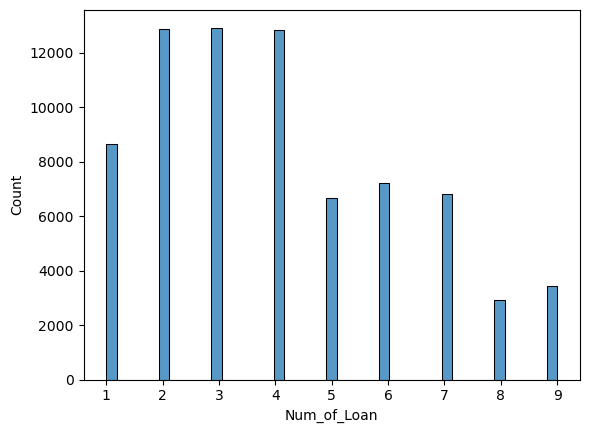

In [481]:
sns.histplot(df['Num_of_Loan'])

<Axes: xlabel='Delay_from_due_date', ylabel='Density'>

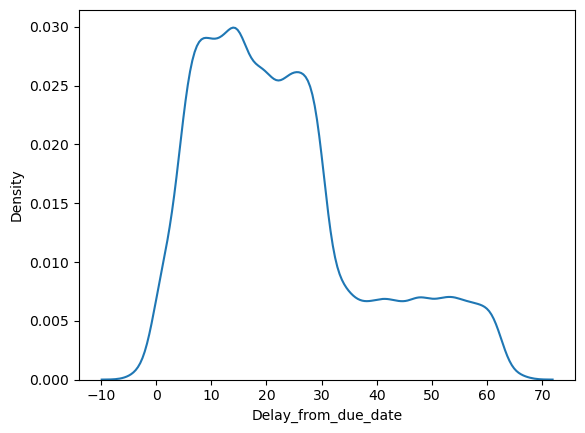

In [482]:
sns.kdeplot(df['Delay_from_due_date'])

In [483]:
df['Delay_from_due_date'].value_counts()

Delay_from_due_date
 15    2570
 8     2264
 13    2231
 14    2183
 9     2176
       ... 
 65      52
 66      25
-4       23
 67      18
-5       18
Name: count, Length: 73, dtype: int64

In [484]:
df['Delay_from_due_date'] = np.abs(df['Delay_from_due_date'])

<Axes: xlabel='Delay_from_due_date', ylabel='Count'>

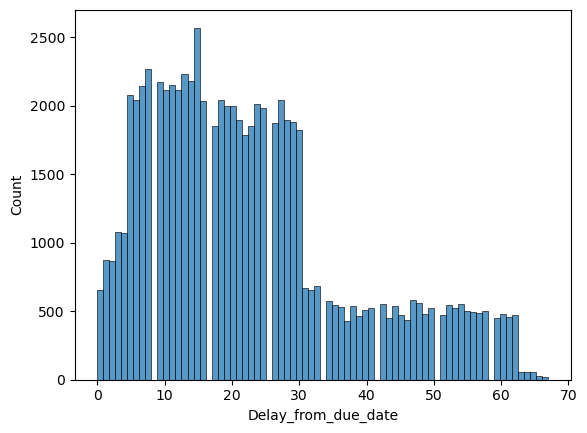

In [485]:
sns.histplot(df['Delay_from_due_date'])

In [486]:
df['Months_Delayed'] = (df['Delay_from_due_date'] // 30)

In [487]:
df.drop(df[df['Months_Delayed']>1.5].index , axis=0 , inplace=True)

<Axes: xlabel='Months_Delayed', ylabel='Count'>

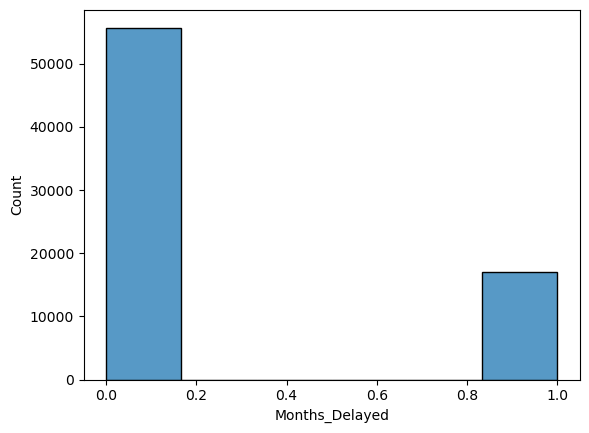

In [488]:
sns.histplot(data=df , x = 'Months_Delayed' , bins=6)

In [489]:
df = df.drop('Delay_from_due_date', axis=1)

In [490]:
df['Num_of_Delayed_Payment'].value_counts()

Num_of_Delayed_Payment
17.00       4324
19.00       4308
16.00       4153
18.00       4117
20.00       4101
            ... 
2,616.00       1
1,164.00       1
749.00         1
3,489.00       1
221.00         1
Name: count, Length: 524, dtype: int64

<Axes: xlabel='Num_of_Delayed_Payment', ylabel='Density'>

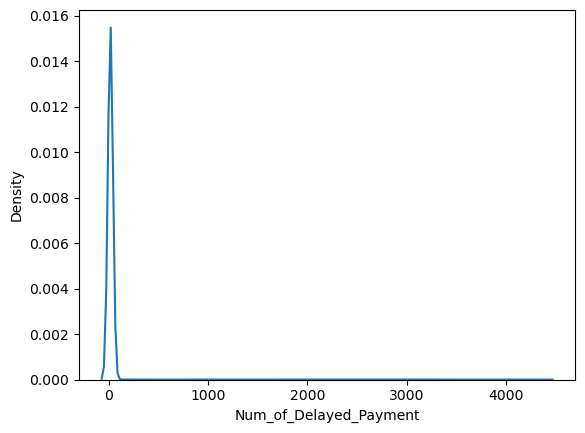

In [491]:
sns.kdeplot(df['Num_of_Delayed_Payment'])

In [492]:
df.drop(df[(df['Num_of_Delayed_Payment']>=25) ].index, axis=0 , inplace=True)

<Axes: xlabel='Num_of_Delayed_Payment', ylabel='Count'>

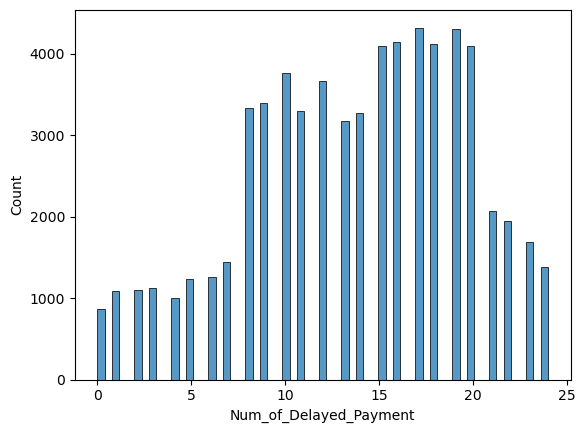

In [493]:
sns.histplot(df['Num_of_Delayed_Payment'])

<Axes: xlabel='Changed_Credit_Limit', ylabel='Density'>

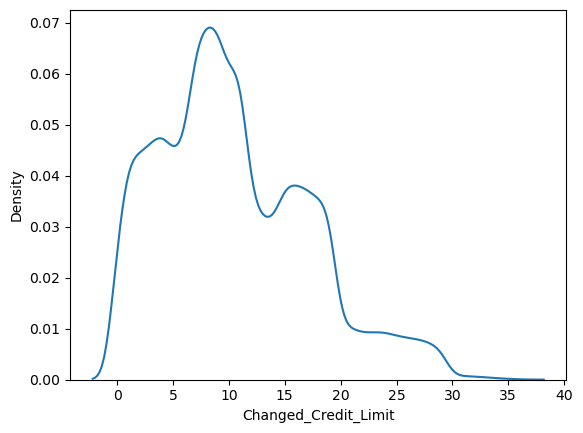

In [494]:
sns.kdeplot(df['Changed_Credit_Limit'])

In [495]:
df['Outstanding_Debt'].value_counts()

Outstanding_Debt
1286    90
1354    87
412     76
1450    76
1421    75
        ..
3955     1
2490     1
3492     1
4612     1
4907     1
Name: count, Length: 3605, dtype: int64

In [496]:
df = df[df['Outstanding_Debt'] <= 2000]

<Axes: xlabel='Outstanding_Debt', ylabel='Count'>

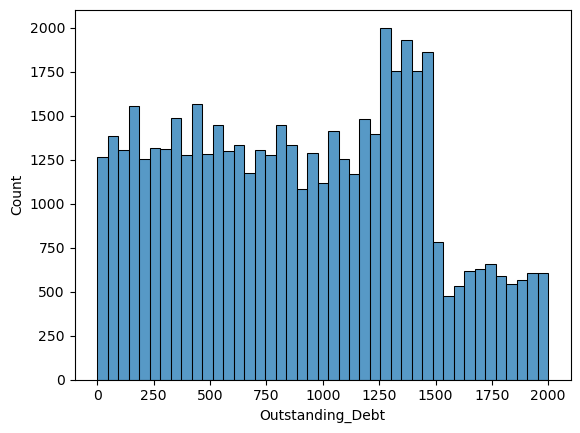

In [497]:
sns.histplot(df['Outstanding_Debt'])

<Axes: xlabel='Credit_Utilization_Ratio', ylabel='Density'>

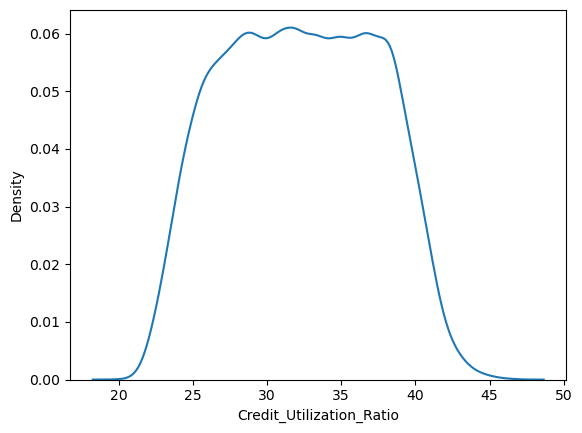

In [498]:
sns.kdeplot(df['Credit_Utilization_Ratio'])

In [499]:
Check_Outliers(df , 'Total_EMI_per_month')['Total_EMI_per_month'].max()

341.89686078286763

<Axes: xlabel='Total_EMI_per_month', ylabel='Density'>

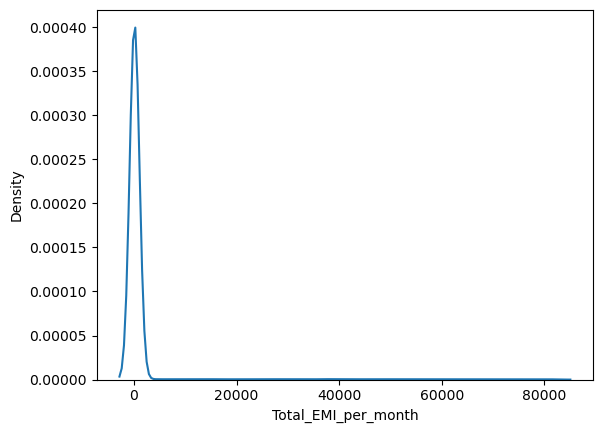

In [500]:
sns.kdeplot(df['Total_EMI_per_month'])

### Make a Function to replace Outliers with NAN

In [502]:
def replace_outliers_with_nan(df, column):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    df[column] = df[column].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)

    return df

In [503]:
df = replace_outliers_with_nan(df, 'Total_EMI_per_month')

<Axes: xlabel='Total_EMI_per_month', ylabel='Density'>

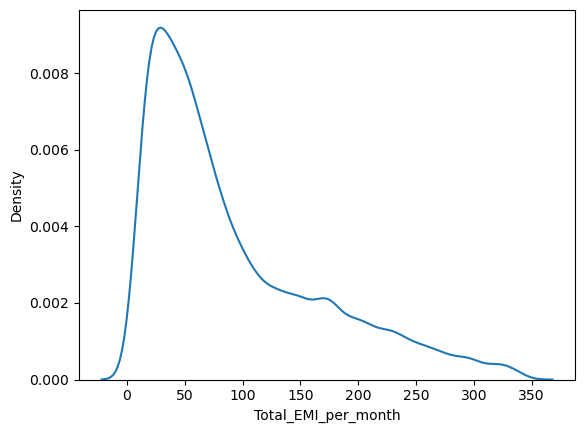

In [504]:
sns.kdeplot(df['Total_EMI_per_month'])

In [505]:
df['Amount_invested_monthly'] = np.log(df['Amount_invested_monthly'])

<Axes: xlabel='Amount_invested_monthly', ylabel='Count'>

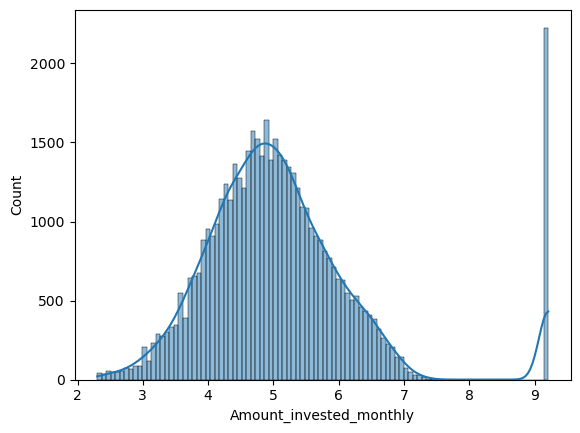

In [506]:
sns.histplot(df['Amount_invested_monthly'], kde=True)

In [507]:
df.drop(df[df['Amount_invested_monthly'] > 9].index , axis=0 , inplace= True)

<Axes: xlabel='Amount_invested_monthly', ylabel='Count'>

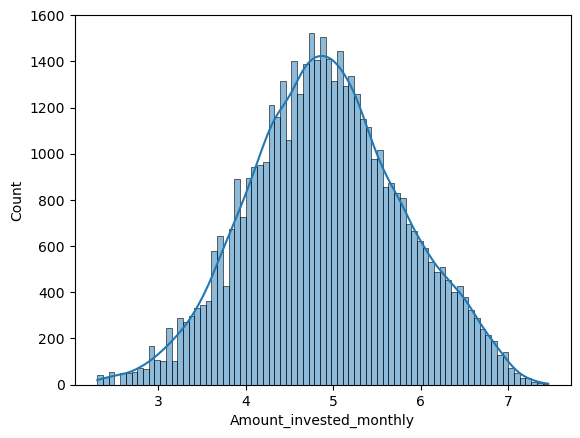

In [508]:
sns.histplot(df['Amount_invested_monthly'], kde=True)

<Axes: xlabel='Num_Credit_Inquiries', ylabel='Density'>

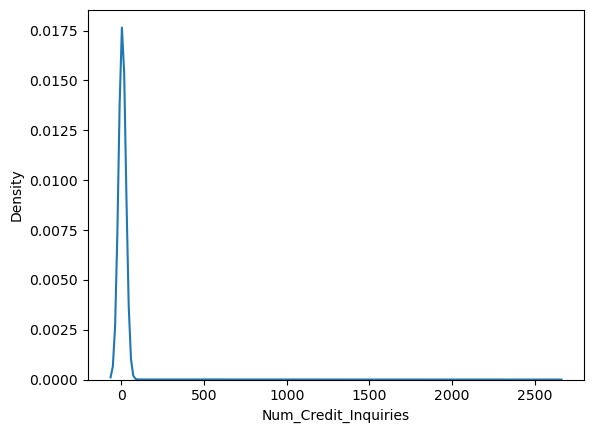

In [509]:
sns.kdeplot(df['Num_Credit_Inquiries'])

In [510]:
df = Check_Outliers(df , 'Num_Credit_Inquiries')

<Axes: xlabel='Num_Credit_Inquiries', ylabel='Count'>

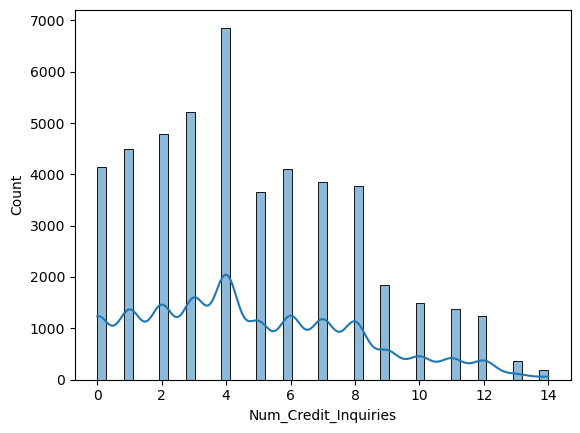

In [511]:
sns.histplot(df['Num_Credit_Inquiries'] , kde=True)

In [512]:
df['Monthly_Balance'].unique()

array([ 312.,  284.,  223., ..., 1166., 1150., 1092.])

In [513]:
df = Check_Outliers(df , 'Monthly_Balance')

In [514]:
df['Interest_Rate'].unique()

array([ 3.,  6.,  8.,  4., 15.,  7., 12., 20.,  1., nan, 14., 17., 10.,
       18., 19.,  9., 32.,  5., 11., 29., 31., 16., 23.,  2., 24., 28.,
       21., 13., 26., 34., 30., 27., 25., 22., 33.])

<Axes: xlabel='Interest_Rate', ylabel='Density'>

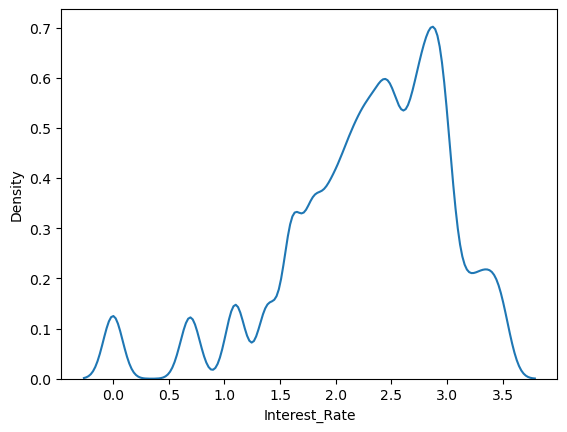

In [515]:
sns.kdeplot( np.log(df['Interest_Rate']))

In [516]:
df['Interest_Rate'] = np.log(df['Interest_Rate'])

In [517]:
df['Interest_Rate'].min()

0.0

In [518]:
df.drop(df[df['Interest_Rate'] > 4 ].index , axis=0 , inplace=True)

<Axes: xlabel='Interest_Rate', ylabel='Count'>

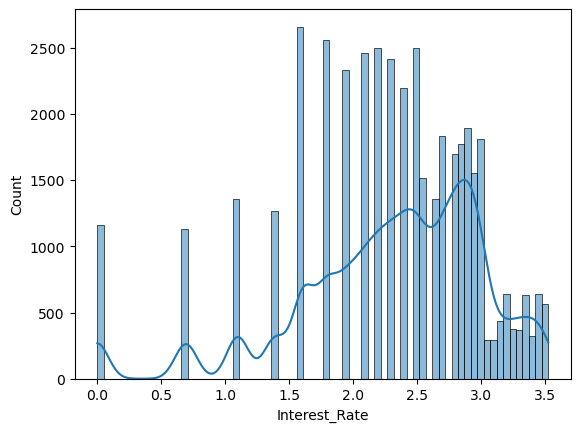

In [519]:
sns.histplot(df['Interest_Rate'] , kde=True)

### Handling missing values

In [521]:
df.isnull().mean()*100

Age                         0.00
Occupation                  0.00
Annual_Income               0.00
Monthly_Inhand_Salary      14.97
Num_Bank_Accounts           0.00
Num_Credit_Card             0.00
Interest_Rate               1.99
Num_of_Loan                 0.00
Num_of_Delayed_Payment      6.98
Changed_Credit_Limit        2.08
Num_Credit_Inquiries        0.00
Credit_Mix                  0.00
Outstanding_Debt            0.00
Credit_Utilization_Ratio    0.00
Credit_History_Age          9.07
Payment_of_Min_Amount       0.00
Total_EMI_per_month         6.56
Amount_invested_monthly     4.58
Payment_Behaviour           0.00
Monthly_Balance             0.00
Credit_Score                0.00
Months_Delayed              0.00
dtype: float64

In [522]:
columns_that_filling_mean = ['Monthly_Inhand_Salary' , 'Num_of_Delayed_Payment' , 'Changed_Credit_Limit' ,
                             'Amount_invested_monthly' ,'Credit_History_Age']
columns_that_filling_median = ['Annual_Income' ,'Interest_Rate' , 'Total_EMI_per_month']

In [523]:
for col in columns_that_filling_mean:
    df[col].fillna(df[col].mean() , inplace=True)

In [524]:
for col1 in columns_that_filling_median:
    df[col1].fillna(df[col1].median() , inplace=True)

### Feature Extraction

In [526]:
df = df[df['Payment_Behaviour'] != '!@9#%8']
df[['Spending_Level', 'Payment_Value']] = df['Payment_Behaviour'].str.split('_', n=1, expand=True)
df['Payment_Value'] = df['Payment_Value'].str.rsplit('_', n=1, expand=True)[0]
df['Payment_Value'] = df['Payment_Value'].str.rsplit('_', n=1, expand=True)[0]  
df['Payment_Value'] = df['Payment_Value'].str.replace('spent_', '')

In [527]:
categorical_columns

['Occupation',
 'Credit_Mix',
 'Spending_Level',
 'Payment_Value',
 'Payment_of_Min_Amount']

Occupation column removed 5343 rows.
Credit_Mix column removed 7046 rows.
Spending_Level column removed 0 rows.
Payment_Value column removed 0 rows.
Payment_of_Min_Amount column removed 0 rows.

Analysis for column: Occupation
##################################################
Unique values count: 14
Unique values: ['Scientist' 'Teacher' 'Entrepreneur' 'Doctor' 'Journalist' 'Engineer'
 'Lawyer' 'Accountant' 'Architect' 'Musician' 'Writer' 'Manager'
 'Developer' 'Mechanic']
Value counts:
Occupation
Lawyer          2215
Architect       2141
Doctor          2042
Entrepreneur    2028
Scientist       2014
Teacher         1994
Musician        1977
Mechanic        1963
Engineer        1961
Writer          1906
Developer       1904
Accountant      1898
Journalist      1882
Manager         1794
Name: count, dtype: int64


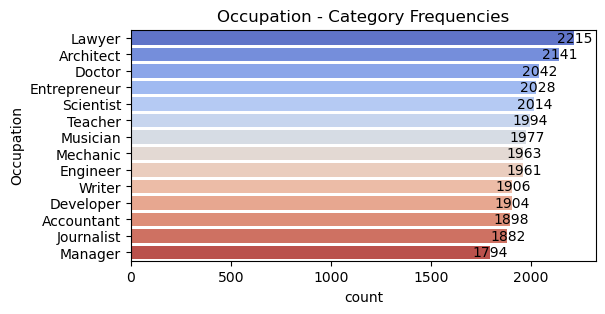

##################################################

Analysis for column: Credit_Mix
##################################################
Unique values count: 3
Unique values: ['Good' 'Standard' 'Bad']
Value counts:
Credit_Mix
Standard    16743
Good         8920
Bad          2056
Name: count, dtype: int64


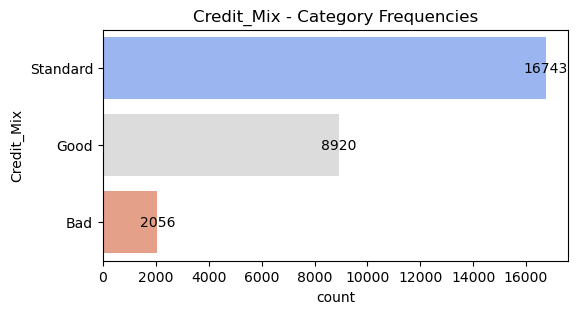

##################################################

Analysis for column: Spending_Level
##################################################
Unique values count: 2
Unique values: ['Low' 'High']
Value counts:
Spending_Level
Low     15138
High    12581
Name: count, dtype: int64


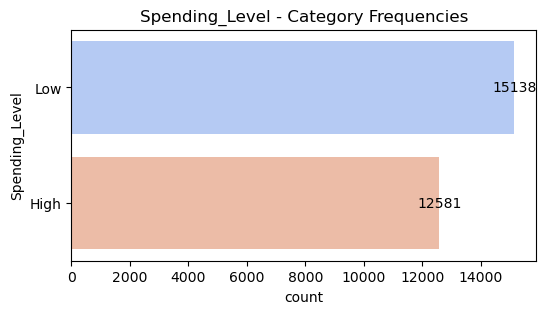

##################################################

Analysis for column: Payment_Value
##################################################
Unique values count: 3
Unique values: ['Large' 'Small' 'Medium']
Value counts:
Payment_Value
Small     11121
Medium     9714
Large      6884
Name: count, dtype: int64


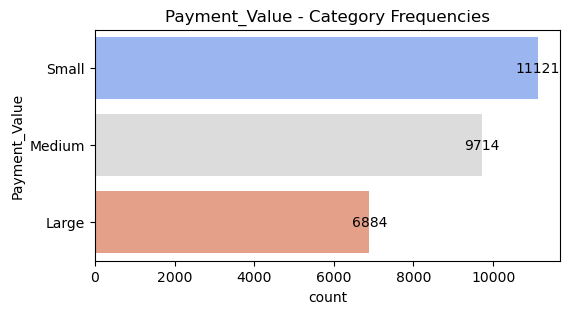

##################################################

Analysis for column: Payment_of_Min_Amount
##################################################
Unique values count: 3
Unique values: ['No' 'NM' 'Yes']
Value counts:
Payment_of_Min_Amount
Yes    13153
No     11244
NM      3322
Name: count, dtype: int64


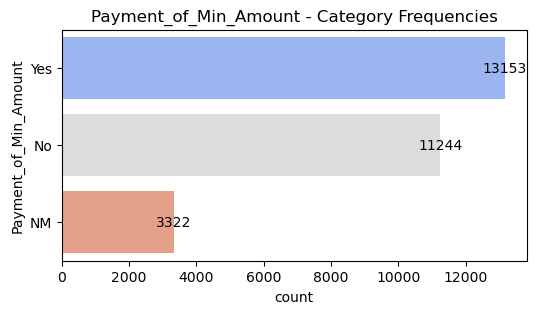

##################################################


In [529]:
def remove_underscore_rows(df, column_name):

    filtered_df = df[~df[column_name].str.contains('_', na=False)]

    removed_rows = len(df) - len(filtered_df)
    print(f"{column_name} column removed {removed_rows} rows.")

    return filtered_df

for col in categorical_columns:
    df = remove_underscore_rows(df, col)

analyze_categorical_columns(df, categorical_columns, True)

In [530]:
replace = {"NM": "No"}
df["Payment_of_Min_Amount"] = df["Payment_of_Min_Amount"].replace(replace)

In [531]:
df["Payment_of_Min_Amount"].value_counts()

Payment_of_Min_Amount
No     14566
Yes    13153
Name: count, dtype: int64

In [532]:
df.duplicated().sum()

0

In [533]:
for col in df.select_dtypes('O').columns:
    print(f"Unique values in {col}: {df[col].unique()}")
    print('*'*100)

Unique values in Occupation: ['Scientist' 'Teacher' 'Entrepreneur' 'Doctor' 'Journalist' 'Engineer'
 'Lawyer' 'Accountant' 'Architect' 'Musician' 'Writer' 'Manager'
 'Developer' 'Mechanic']
****************************************************************************************************
Unique values in Credit_Mix: ['Good' 'Standard' 'Bad']
****************************************************************************************************
Unique values in Payment_of_Min_Amount: ['No' 'Yes']
****************************************************************************************************
Unique values in Payment_Behaviour: ['Low_spent_Large_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' 'High_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'High_spent_Small_value_payments']
****************************************************************************************************
Unique values in Credit_Score: ['Good' 'Standard' 'Poor

In [534]:
mod = df['Credit_Score'].mode()[0]
df['Credit_Score'].fillna(mod, inplace=True)

In [535]:
df = df.reset_index(drop=True)

In [536]:
df.isnull().mean()*100

Age                        0.00
Occupation                 0.00
Annual_Income              0.00
Monthly_Inhand_Salary      0.00
Num_Bank_Accounts          0.00
Num_Credit_Card            0.00
Interest_Rate              0.00
Num_of_Loan                0.00
Num_of_Delayed_Payment     0.00
Changed_Credit_Limit       0.00
Num_Credit_Inquiries       0.00
Credit_Mix                 0.00
Outstanding_Debt           0.00
Credit_Utilization_Ratio   0.00
Credit_History_Age         0.00
Payment_of_Min_Amount      0.00
Total_EMI_per_month        0.00
Amount_invested_monthly    0.00
Payment_Behaviour          0.00
Monthly_Balance            0.00
Credit_Score               0.00
Months_Delayed             0.00
Spending_Level             0.00
Payment_Value              0.00
dtype: float64

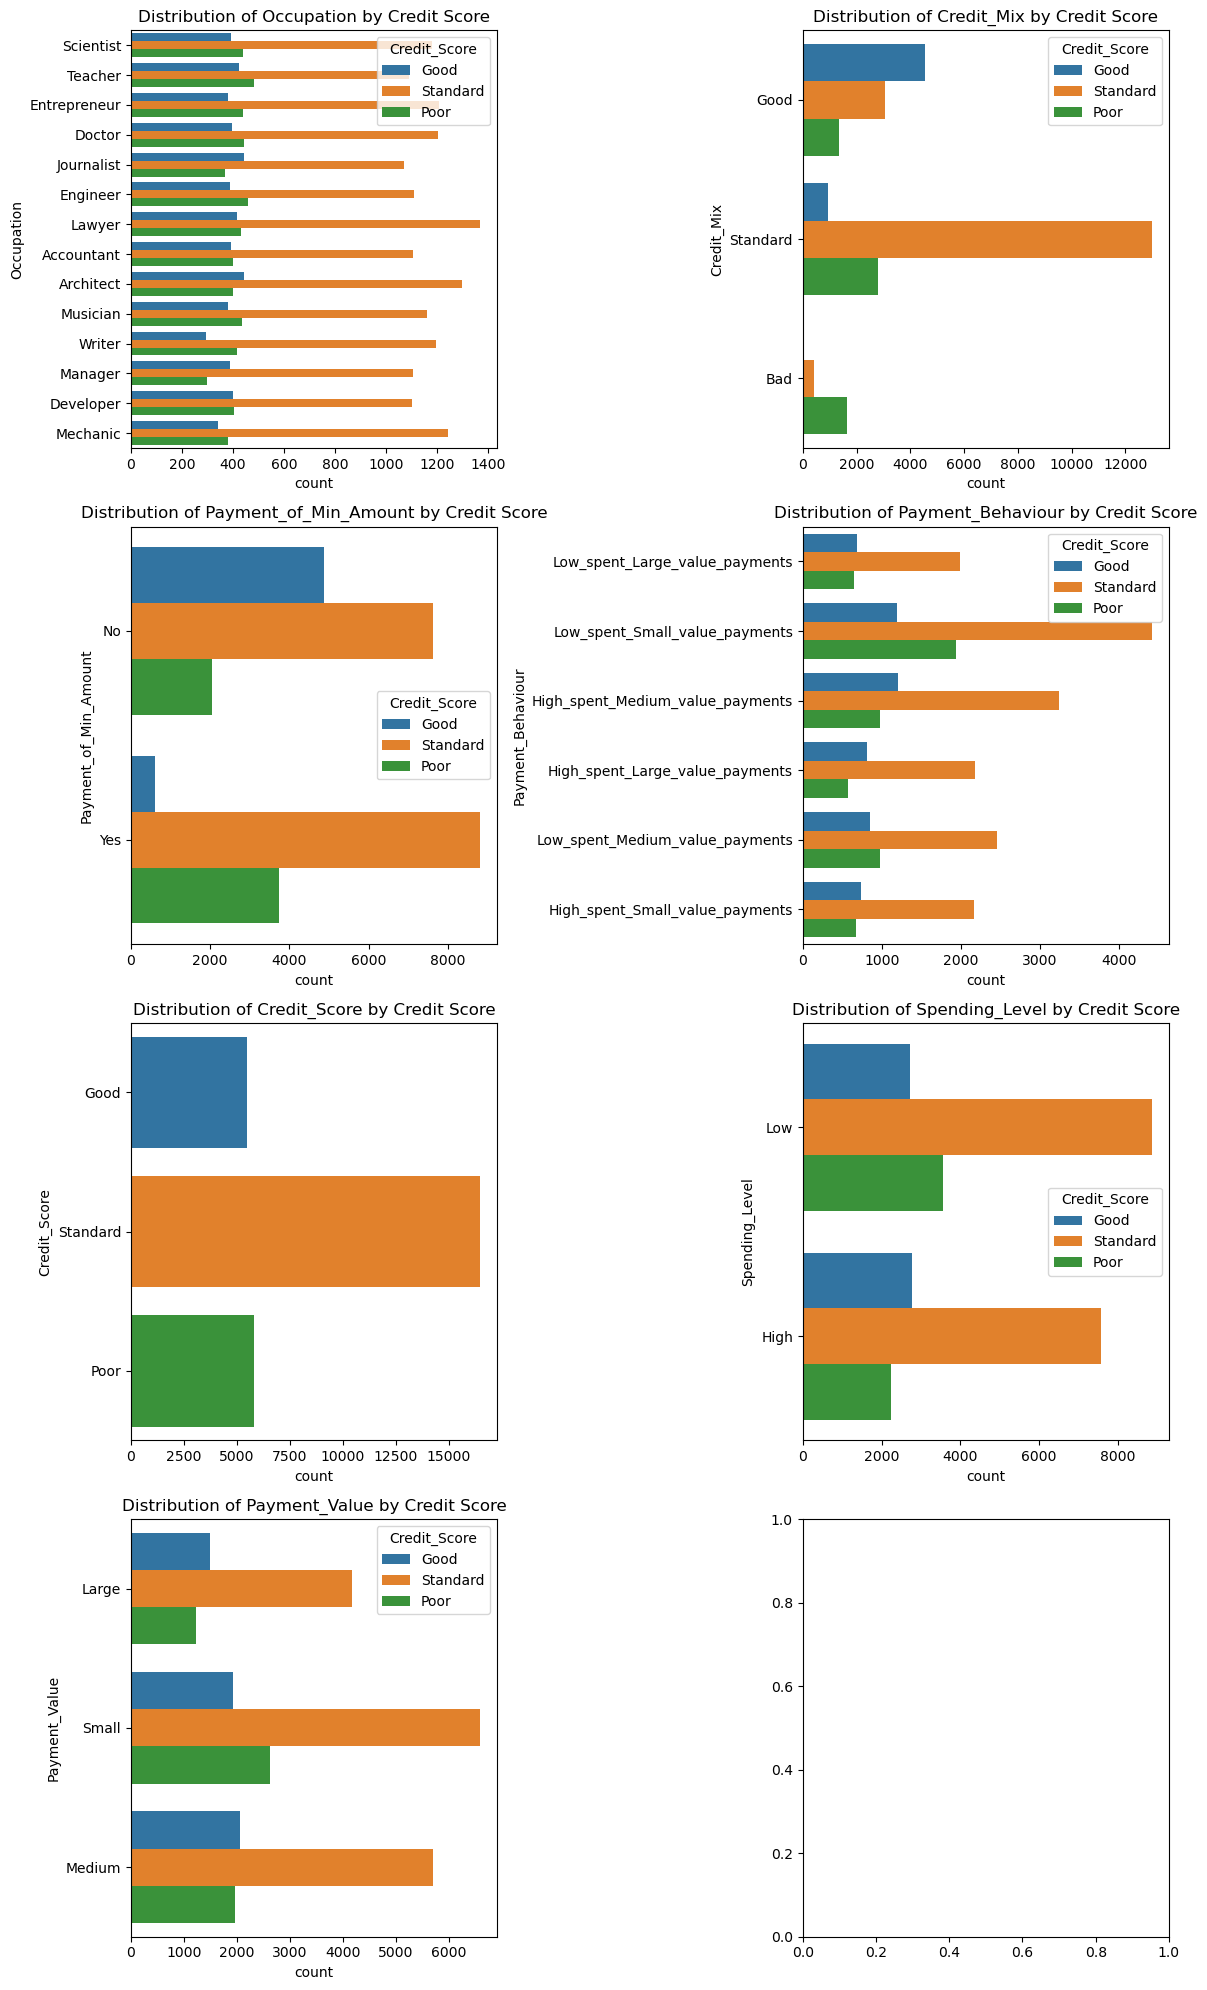

In [537]:

cat_cols = df.select_dtypes('O').columns


n_cols = 2
n_rows = int(np.ceil(len(cat_cols) / n_cols))


fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
axes = axes.flatten()


for i, col in enumerate(cat_cols):
    sns.countplot(y=df[col], hue=df['Credit_Score'], ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Credit Score')


plt.tight_layout()
plt.show()


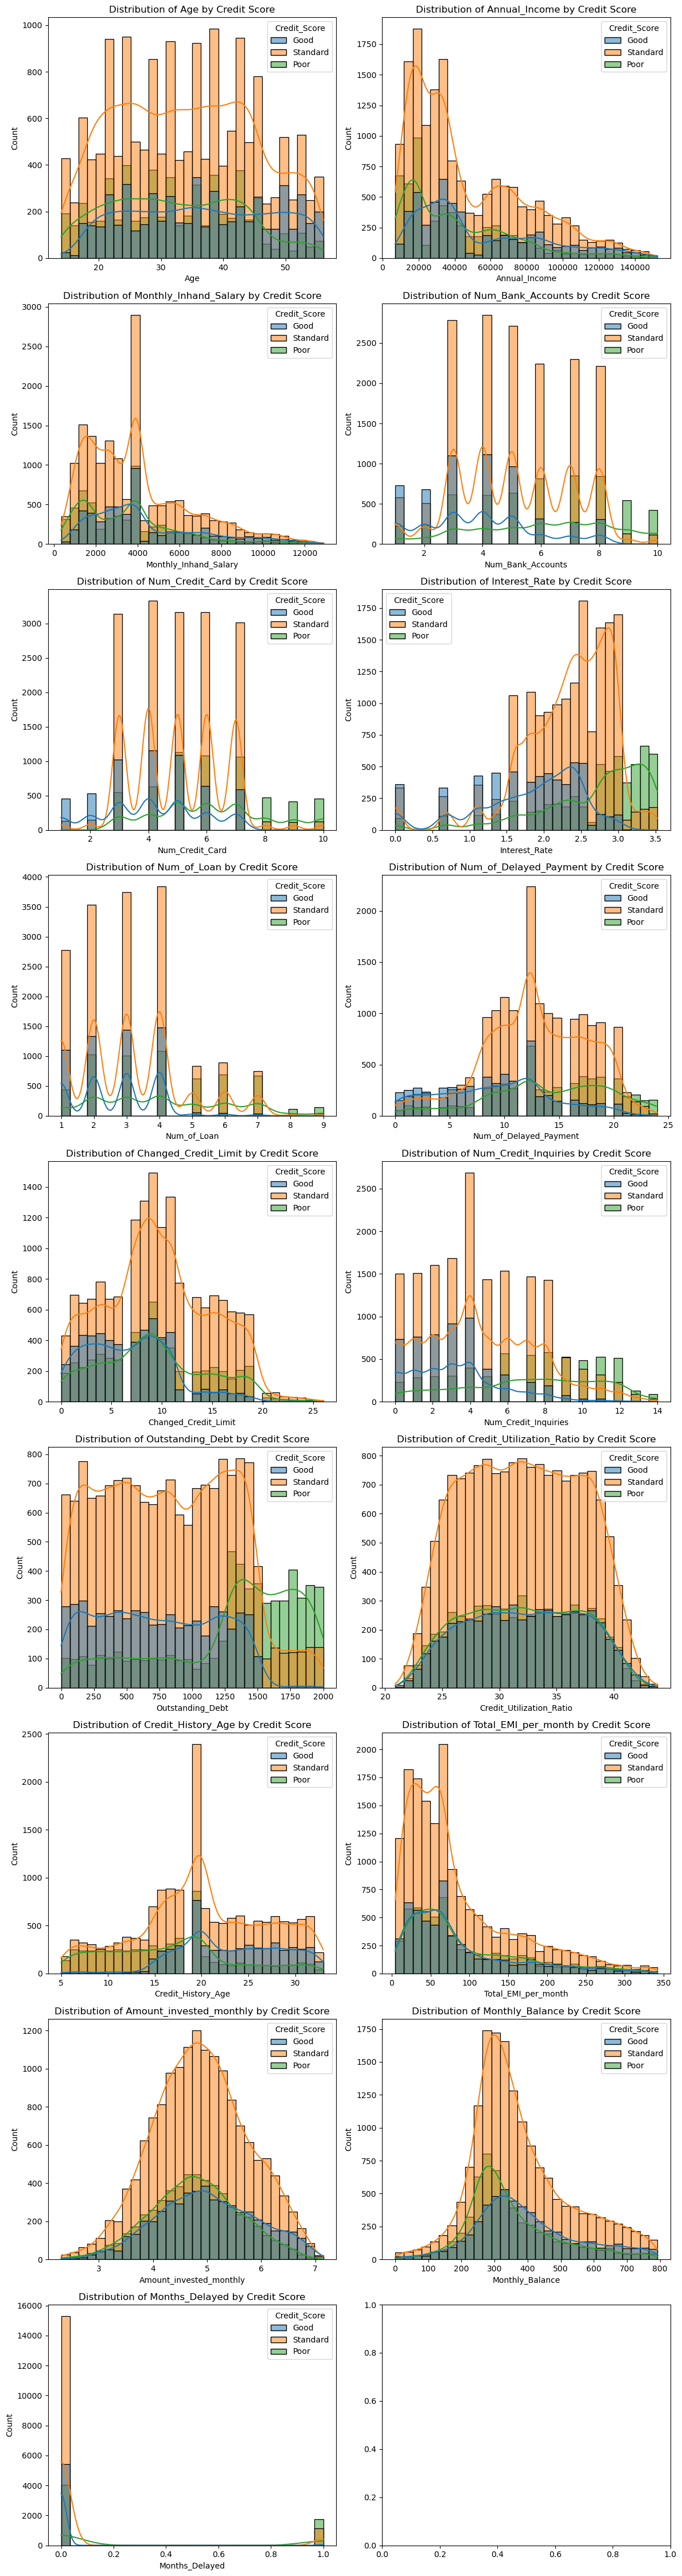

In [538]:
num_cols = df.select_dtypes('number').columns

n_cols = 2
n_rows = int(np.ceil(len(num_cols) / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, hue=df['Credit_Score'], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Credit Score')


plt.tight_layout()
plt.show()


<Axes: >

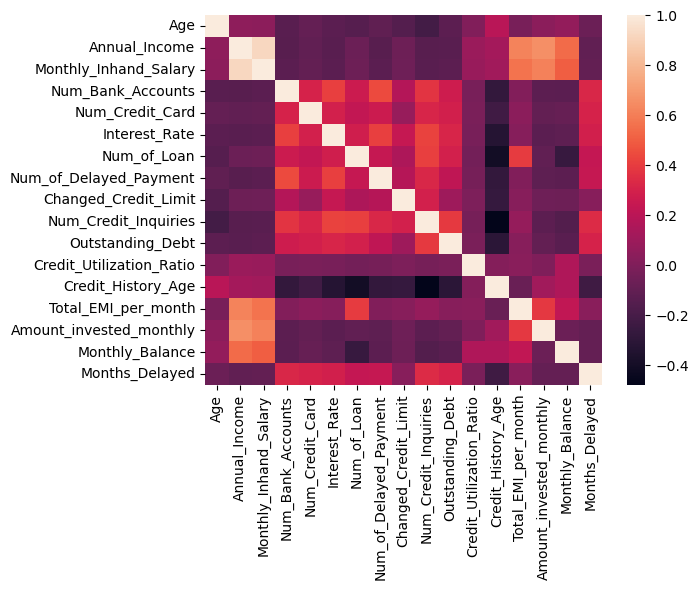

In [539]:
sns.heatmap(df.select_dtypes('number').corr())

In [540]:
df['Credit_Score'].value_counts()

Credit_Score
Standard    16440
Poor         5793
Good         5486
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Credit_Score'>

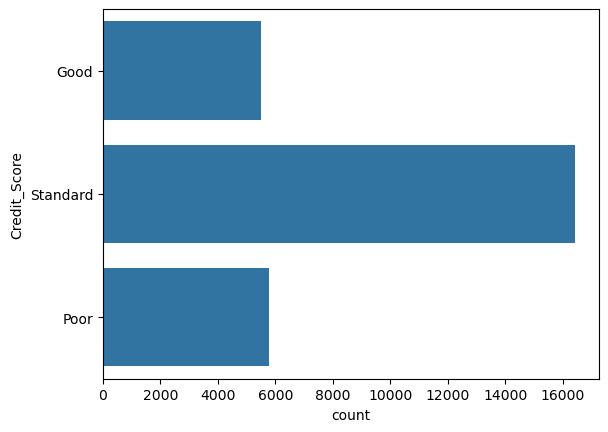

In [541]:
sns.countplot(df['Credit_Score'])

In [544]:
df = pd.concat([df1 , df2 , df3]).reset_index(drop=True)

In [545]:
df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Months_Delayed,Spending_Level,Payment_Value
0,25,Teacher,29633,"2,370.50",7,4,2.71,2,18.00,9.00,9.00,Standard,113,32.85,6.00,Yes,32.23,4.79,High_spent_Small_value_payments,343.00,Standard,0,High,Small
1,35,Accountant,66749,"5,379.47",6,4,2.20,3,12.00,10.00,10.00,Standard,303,27.61,11.00,Yes,89.78,4.79,High_spent_Large_value_payments,567.00,Standard,0,High,Large
2,24,Engineer,61056,"5,086.02",3,7,2.08,2,13.00,9.00,4.00,Standard,566,41.75,16.00,No,83.57,5.73,Low_spent_Large_value_payments,386.00,Standard,0,Low,Large
3,43,Doctor,56366,"4,897.22",5,3,3.00,2,21.00,19.00,5.00,Standard,327,39.98,23.00,Yes,62.65,5.18,High_spent_Medium_value_payments,496.00,Standard,0,High,Medium
4,42,Scientist,9559,789.61,8,7,1.79,6,17.00,8.00,7.00,Standard,1234,29.39,16.00,No,37.73,4.09,Low_spent_Small_value_payments,271.00,Standard,0,Low,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21274,43,Lawyer,80807,"6,796.95",3,4,1.79,3,15.00,4.00,3.00,Good,970,40.03,19.93,No,161.03,4.56,High_spent_Large_value_payments,662.00,Good,0,High,Large
21275,43,Lawyer,80807,"6,796.95",3,4,1.79,3,13.00,2.00,3.00,Good,970,37.11,32.00,No,161.03,4.83,High_spent_Small_value_payments,653.00,Good,0,High,Small
21276,44,Lawyer,80807,"6,796.95",3,4,1.79,3,13.00,4.00,3.00,Good,970,30.44,32.00,No,161.03,6.02,Low_spent_Large_value_payments,378.00,Good,0,Low,Large
21277,44,Lawyer,80807,"6,796.95",3,4,1.79,3,14.00,4.00,3.00,Good,970,37.07,32.00,No,161.03,6.08,Low_spent_Medium_value_payments,361.00,Good,0,Low,Medium


<Axes: xlabel='count', ylabel='Credit_Score'>

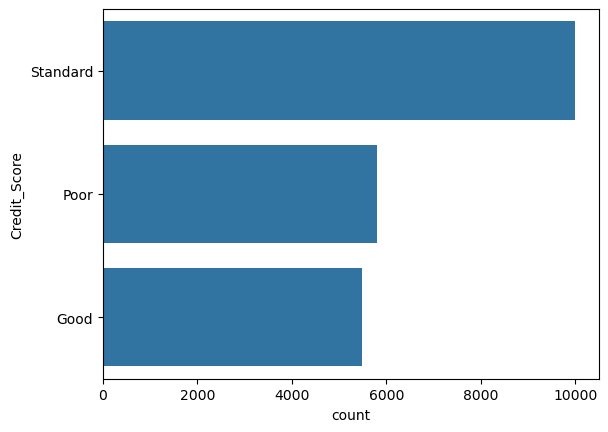

In [546]:
sns.countplot(df['Credit_Score'])

In [547]:
for col in df.select_dtypes('O'):
    print(f' {col} --->> {df[col].unique()}')

 Occupation --->> ['Teacher' 'Accountant' 'Engineer' 'Doctor' 'Scientist' 'Musician'
 'Manager' 'Journalist' 'Architect' 'Writer' 'Developer' 'Lawyer'
 'Mechanic' 'Entrepreneur']
 Credit_Mix --->> ['Standard' 'Good' 'Bad']
 Payment_of_Min_Amount --->> ['Yes' 'No']
 Payment_Behaviour --->> ['High_spent_Small_value_payments' 'High_spent_Large_value_payments'
 'Low_spent_Large_value_payments' 'High_spent_Medium_value_payments'
 'Low_spent_Small_value_payments' 'Low_spent_Medium_value_payments']
 Credit_Score --->> ['Standard' 'Poor' 'Good']
 Spending_Level --->> ['High' 'Low']
 Payment_Value --->> ['Small' 'Large' 'Medium']


### Prepare for ML and Encode the categorical columns

In [549]:
be = BinaryEncoder()

df_binary = be.fit_transform(df['Occupation'])

In [550]:
credit_mix_order = ['Bad', 'Standard', 'Good']
credit_score_order = ['Poor', 'Standard', 'Good']
payment_behaviour_order = [
    'Low_spent_Small_value_payments',
    'Low_spent_Medium_value_payments',
    'Low_spent_Large_value_payments',
    'High_spent_Small_value_payments',
    'High_spent_Medium_value_payments',
    'High_spent_Large_value_payments'
]

ord = OrdinalEncoder(categories=[credit_mix_order , credit_score_order ,payment_behaviour_order ])

df[['Credit_Mix' , 'Credit_Score' , 'Payment_Behaviour']] = ord.fit_transform(df[['Credit_Mix' , 'Credit_Score', 'Payment_Behaviour']])

In [551]:
mapper_Payment_of_Min_Amount  = {
    'Yes' : 1,
    'No' : 0
}

In [552]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map(mapper_Payment_of_Min_Amount)

In [553]:
ohe = OneHotEncoder(sparse_output=False , drop='first')
col = ['Spending_Level' , 'Payment_Value']

df_ohe = pd.DataFrame(ohe.fit_transform(df[col]) , columns=ohe.get_feature_names_out())

In [554]:
drop_to_encode = ['Spending_Level' , 'Payment_Value' , 'Occupation']

In [555]:
df = pd.concat([df, df_binary , df_ohe] , axis=1).drop(drop_to_encode , axis = 1)

In [556]:
df.isnull().mean()*100

Age                        0.00
Annual_Income              0.00
Monthly_Inhand_Salary      0.00
Num_Bank_Accounts          0.00
Num_Credit_Card            0.00
Interest_Rate              0.00
Num_of_Loan                0.00
Num_of_Delayed_Payment     0.00
Changed_Credit_Limit       0.00
Num_Credit_Inquiries       0.00
Credit_Mix                 0.00
Outstanding_Debt           0.00
Credit_Utilization_Ratio   0.00
Credit_History_Age         0.00
Payment_of_Min_Amount      0.00
Total_EMI_per_month        0.00
Amount_invested_monthly    0.00
Payment_Behaviour          0.00
Monthly_Balance            0.00
Credit_Score               0.00
Months_Delayed             0.00
Occupation_0               0.00
Occupation_1               0.00
Occupation_2               0.00
Occupation_3               0.00
Spending_Level_Low         0.00
Payment_Value_Medium       0.00
Payment_Value_Small        0.00
dtype: float64

In [659]:
x , y = df.drop(['Credit_Score'] , axis=1) , df[['Credit_Score']]

In [661]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.1 , random_state=5 , stratify=y)

In [663]:
x_train = np.where(np.isinf(x_train), np.nan, x_train)
x_test = np.where(np.isinf(x_test), np.nan, x_test)

x_train = np.nan_to_num(x_train, nan=np.nanmean(x_train))
x_test = np.nan_to_num(x_test, nan=np.nanmean(x_test))

scl = StandardScaler()

x_train = scl.fit_transform(x_train)
x_test = scl.transform(x_test)

### LogisticRegression

In [665]:
lr = LogisticRegression()

lr.fit(x_train , y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [667]:
y_train_pred = lr.predict(x_train)
y_test_pred =  lr.predict(x_test)

In [669]:
print(f"Score of Train: {lr.score(x_train , y_train)}")
print(f"Score of Test: {lr.score(x_test , y_test)}")

Score of Train: 0.7037230431831236
Score of Test: 0.6992481203007519


### Decision Tree

In [672]:
DT = DecisionTreeClassifier(max_depth=3)

DT.fit(x_train , y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [674]:
print(f"Score of Train: {DT.score(x_train , y_train)}")
print(f"Score of Test: {DT.score(x_test , y_test)}")

Score of Train: 0.7108245000261083
Score of Test: 0.7124060150375939


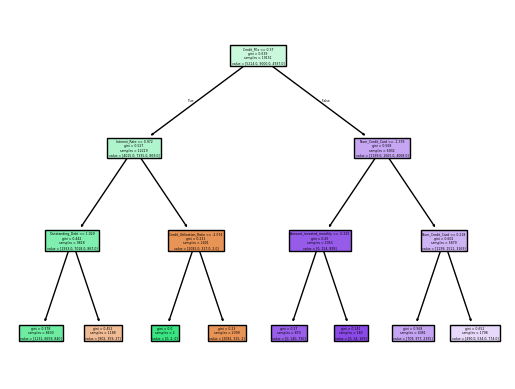

In [676]:
plt.figure()
plot_tree(DT , feature_names=x.columns, filled=True)
plt.show()

### RandomForestClassifier

In [678]:
R = RandomForestClassifier(n_estimators=100 , random_state=5 , max_depth=10)

R.fit(x_train , y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [680]:
print(f"Score of Train: {R.score(x_train , y_train)}")
print(f"Score of Test: {R.score(x_test , y_test)}")

Score of Train: 0.7425199728473709
Score of Test: 0.7302631578947368


####  GradientBoostingClassifier

In [683]:
G = GradientBoostingClassifier(n_estimators=10 , max_depth=7)

G.fit(x_train , y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,10
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,7
,min_impurity_decrease,0.0
,init,None


In [685]:
print(f"Score of Train: {G.score(x_train , y_train)}")
print(f"Score of Test: {G.score(x_test , y_test)}")

Score of Train: 0.7521800428176074
Score of Test: 0.7377819548872181


### XGBClassifier

In [687]:
X = XGBClassifier(n_estimators = 10 , max_depth = 8)

X.fit(x_train , y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [689]:
print(f"Score of Train: {X.score(x_train , y_train)}")
print(f"Score of Test: {X.score(x_test , y_test)}")

Score of Train: 0.7838232990444364
Score of Test: 0.7504699248120301
